In [1]:
from init_messg import init_sr830, init_fgen, init_hameg
from calibration import start_calibration
import mess_func

import ivi
import time
import os

import numpy as np
import matplotlib.pylab as plt

from datetime import datetime
import pandas as pd

sensitivity=22  # 23...100mV, 22...50mV, 21...20mV, 20...10mV, 19...5mV
i=1   # signal input: 0...A, 1...A-B
SR830 = init_sr830(sensitivity,i)
reset=False
fgen = init_fgen(reset)
powersupply = init_hameg(1)  # 1...5V, 2...12V

ASRL::/dev/ttyUSB1,19200,8e1::INSTR
lock-in ready
function generator ready
ASRL::/dev/ttyUSB0,9600,8n1::INSTR
power supply ready


In [4]:
u,ph = start_calibration(SR830, fgen, 9240.2, 5)

NameError: name 'start_calibration' is not defined

In [1]:
# define measurement setup
measurement_box = "LEFM-A"
box_supply = "5 V"  # supply voltage from powersupply
sensor = "LEFM-K08-A"
mode = '3'
frequency = "9240.2 Hz"
d_minus = ' 5.000 V'#f"{u0}V"  # drive voltage ch1 from function generator
d_plus = '5.000 V'#f"{u_min}V"   # drive voltage ch2 from function generator


meas_t_const=9     # 8..100ms; 9..300ms; 10...1s; 11...3s
meas_t_sleep=0.5   # time betveen voltage change in s
meas_u_max=30      # maximum voltage in V
meas_n_meas=30     # number of measurements from 0V to meas_u_max
n_avg=8            # number of averages
t_avg=0.001        # time between averege measurement

df, date, time=mess_func.meas(SR830, powersupply, time_const, t_sleep, t_avg, u_max, n_meas, n_avg, symetric, 
                           measurement_box, box_supply, sensor, mode, frequency, d_minus, d_plus)
u_vec = df['U']
r_vec = df['R']
phi_vec = df['Phi']

NameError: name 'mess_func' is not defined

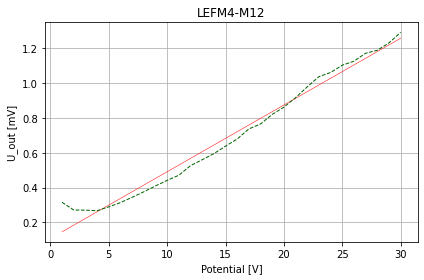

In [11]:
u = np.array(np.array(u_vec))#np.array((np.array(u_vec))/(distance*1000)) # in kV/m
r = np.array(r_vec)*1000 #in mV
phi = np.array(phi_vec)

# create the first plot
fig, ax1 = plt.subplots()
# plot the voltage data
line1, =ax1.plot(u,r,'b-',label='U_out')
ax1.set_xlabel('Voltage [V]')
ax1.set_ylabel('U_out [mV]',color='b')
ax1.tick_params(axis='y',labelcolor='b')
ax1.grid(True)
# create second y-axis
ax2 = ax1.twinx()
# plot the phase data
line2, =ax2.plot(u,phi,'r-', label='Phi_out')
ax2.set_ylabel('Phi_out [°]',color='r')
ax2.tick_params(axis='y',labelcolor='r')
# add legends
lines = [line1,line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='lower left')

# display the plot
plt.title(f'{sensor} with {measurement_box}-{box_supply} at {frequency} in mode {mode} on {date} {time}')
plt.show()
# save the plot to a file
fig.savefig(f"{sensor}_{date}_{time}.png", dpi=300)  # different output formats like .pdf or .svg available  